In [1]:
import os
import pandas as pd
import numpy as np
import requests
import json
import glob
import re
import seaborn as sns
from matplotlib import pyplot as plt
from monty.serialization import loadfn

os.environ['BEEP_ENV'] = 'dev'

__Reading in files__:

In [2]:
#Directories for old data DeltaQFastCharge and TrajectoryFastCharge
# old_d_dir = './FastCharge/data-share/features/DeltaQFastCharge'
# old_t_dir = './FastCharge/data-share/features/TrajectoryFastCharge'

#Directories for new data DeltaQFastCharge and TrajectoryFastCharge
# new_d_dir = "./NewData/DeltaQFastCharge/"
# new_t_dir = "./NewData/TrajectoryFastCharge/"

In [3]:
path = "E:/Data/TRI/"

old_subpath = "FastCharge/features/"

old_d_dir = path + old_subpath + "DeltaQFastCharge"
old_t_dir = path + old_subpath + "TrajectoryFastCharge"


new_subpath = "NewData/"

new_d_dir = path + new_subpath + "DeltaQFastCharge/"
new_t_dir = path + new_subpath + "TrajectoryFastCharge/"

In [4]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if ".json" in fullPath:
            allFiles.append(fullPath)
    return allFiles

In [5]:
old_d_list = getListOfFiles(old_d_dir)
print(len(old_d_list))
old_d_list[:5]

139


['E:/Data/TRI/FastCharge/features/DeltaQFastCharge\\FastCharge_000000_CH19_features_DeltaQFastCharge.json',
 'E:/Data/TRI/FastCharge/features/DeltaQFastCharge\\FastCharge_000001_CH16_features_DeltaQFastCharge.json',
 'E:/Data/TRI/FastCharge/features/DeltaQFastCharge\\FastCharge_000001_CH30_features_DeltaQFastCharge.json',
 'E:/Data/TRI/FastCharge/features/DeltaQFastCharge\\FastCharge_000001_CH38_features_DeltaQFastCharge.json',
 'E:/Data/TRI/FastCharge/features/DeltaQFastCharge\\FastCharge_000002_CH10_features_DeltaQFastCharge.json']

In [6]:
old_t_list = getListOfFiles(old_t_dir)
print(len(old_t_list))
old_t_list[:5]

139


['E:/Data/TRI/FastCharge/features/TrajectoryFastCharge\\FastCharge_000000_CH19_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/FastCharge/features/TrajectoryFastCharge\\FastCharge_000001_CH16_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/FastCharge/features/TrajectoryFastCharge\\FastCharge_000001_CH30_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/FastCharge/features/TrajectoryFastCharge\\FastCharge_000001_CH38_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/FastCharge/features/TrajectoryFastCharge\\FastCharge_000002_CH10_features_TrajectoryFastCharge.json']

In [7]:
new_d_list = getListOfFiles(new_d_dir)
print(len(new_d_list))
new_d_list[:5]

30


['E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH00_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH01_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH02_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH03_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH04_features_DeltaQFastCharge.json']

In [8]:
new_t_list = getListOfFiles(new_t_dir)
print(len(new_t_list))
new_t_list[:5]

30


['E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH00_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH01_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH02_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH03_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH04_features_TrajectoryFastCharge.json']

Combining DeltaQFastCharge and TrajectoryFastCharge:

In [9]:
def get_new_names(d_list):
    new_names = []
    for file in d_list:
        new_names.append(re.findall("CH(.*?)\_f", file)[0])
    return new_names
        
def make_df(file_list, batch=False):
    df = pd.DataFrame()
    for file in file_list:
        with open(file) as data_file:    
            data = json.load(data_file)
            data_df = pd.json_normalize(data)
            df = pd.concat([df,data_df])
    df.reset_index(drop=True,inplace=True)
    if batch:
        df['bat_num'] = get_new_names(file_list)
    return df

def merge_df(d_df, t_df):
    df_full = d_df.merge(t_df, left_index=True, right_index=True)

    # Making values not stored as lists
    for column in df_full.columns:
        if "X." in column:
            df_full[column] = df_full[column].apply(lambda x: x[0])

    df_full.reset_index(inplace=True)
    return df_full

__Old data__:

In [10]:
old_d_df = make_df(old_d_list, batch=True)
old_d_df.head()

,@module,@class,name,@version,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,X.abs_min_discharge_capacity_difference_cycles_2:100,...,X.internal_resistance_difference_cycles_2:100,X.nominal_capacity_by_median,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.init_pred_cycle,metadata.parameters.mid_pred_cycle,metadata.parameters.final_pred_cycle,metadata.parameters.n_nominal_cycles,bat_num
0,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0454259],[0.8891461000000003],[1.0331815],[231072.4263671875],[614.4000244140625],[-1.1444158302992298],...,[-0.0010415539145469666],[1.047977],el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,10,91,100,40,19
1,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0620247999999999],[0.48970650000000004],[1.0439155],[149767.85131961218],[563.2000122070312],[-1.2773591296554208],...,[0.0003414759412407875],[1.06011365],el150800737229,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,15,10,91,100,40,16
2,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0678786],[0.4961450999999999],[1.054091],[205315.4877278646],[614.4000244140625],[-1.3752393675218624],...,[0.00024036318063735962],[1.06736225],el150800737366,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,29,10,91,100,40,30
3,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0512739],[0.49011190000000004],[1.0341983000000001],[159799.4890051929],[563.2000122070312],[-1.2430890844325302],...,[0.00042933784425258636],[1.05098615],el150800737234,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,37,10,91,100,40,38
4,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0665728],[0.47571469999999993],[1.0695093],[146029.5250360061],[614.4000244140625],[-1.640443517452452],...,[-0.0001586293801665306],[1.0708095],el150800737329,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,9,10,91,100,40,10


In [11]:
batches = []
for i in old_d_df['metadata.protocol']:
    if '2017-05' in i:
        batches.append('b1')
    elif '2017-06' in i:
        batches.append('b2')
    elif '2018-04' in i:
        batches.append('b3')

In [12]:
old_d_df['batches'] = batches
old_d_df['bat_name'] = old_d_df['batches'] + 'c' + old_d_df['bat_num']
old_d_df['bat_name']

0      b2c19
1      b3c16
2      b3c30
3      b3c38
4      b3c10
       ...  
134    b2c25
135    b2c46
136    b2c40
137    b2c34
138    b2c35
Name: bat_name, Length: 139, dtype: object

In [13]:
old_t_df = make_df(old_t_list)
old_t_df.head()

,@module,@class,name,@version,X.capacity_0.98,X.capacity_0.95,X.capacity_0.92,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[127],[269],[376],[423],[449],[467],[483],el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,0.98,0.78,0.03
1,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[125],[276],[426],[528],[613],[668],[668],el150800737229,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,15,0.98,0.78,0.03
2,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[774],[774],[774],[774],[774],[774],[774],el150800737366,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,29,0.98,0.78,0.03
3,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[543],[543],[543],[543],[543],[543],[543],el150800737234,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,37,0.98,0.78,0.03
4,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1011],[1011],[1011],[1011],[1011],[1011],[1011],el150800737329,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,9,0.98,0.78,0.03


In [14]:
old_df_full = merge_df(old_d_df, old_t_df)
old_df_full.sort_values(by=['bat_name'],inplace=True)
old_df_full.head()

,index,@module_x,@class_x,name_x,@version_x,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,...,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode_y,metadata.protocol_y,metadata.channel_id_y,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
98,98,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.069159,0.609605,1.075878,194523.331238,768.000000,...,1191,1191,1191,1191,EL150800460514,2017-05-12_TESTS\20170512-3_6C-80PER_3_6C.SDU,0,0.98,0.78,0.03
13,13,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.021925,0.234529,1.010972,163310.066862,819.200012,...,528,663,665,665,EL150800460514,2017-05-12_TESTS\20170512-3_6C-80PER_3_6C.SDU,0,0.98,0.78,0.03
78,78,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.072973,0.607773,1.079325,182982.491752,563.200012,...,583,605,625,638,EL150800463886,2017-05-12_TESTS\20170512-4_8C-80PER_4_8C.SDU,9,0.98,0.78,0.03
96,96,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.070200,0.609325,1.061485,178767.125004,537.599976,...,441,492,525,536,EL150800464002,2017-05-12_TESTS\20170512-5_4C-80PER_5_4C.SDU,10,0.98,0.78,0.03
97,97,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.080072,0.606653,1.076906,184036.176107,512.000000,...,492,526,549,561,EL150800463871,2017-05-12_TESTS\20170512-5_4C-80PER_5_4C.SDU,11,0.98,0.78,0.03


In [15]:
old_df_full.keys()

Index(['index', '@module_x', '@class_x', 'name_x', '@version_x',
       'X.discharge_capacity_cycle_2', 'X.max_discharge_capacity_difference',
       'X.discharge_capacity_cycle_100',
       'X.integrated_time_temperature_cycles_1:100',
       'X.charge_time_cycles_1:5',
       'X.abs_min_discharge_capacity_difference_cycles_2:100',
       'X.abs_mean_discharge_capacity_difference_cycles_2:100',
       'X.abs_variance_discharge_capacity_difference_cycles_2:100',
       'X.abs_skew_discharge_capacity_difference_cycles_2:100',
       'X.abs_kurtosis_discharge_capacity_difference_cycles_2:100',
       'X.abs_first_discharge_capacity_difference_cycles_2:100',
       'X.max_temperature_cycles_1:100', 'X.min_temperature_cycles_1:100',
       'X.slope_discharge_capacity_cycle_number_2:100',
       'X.intercept_discharge_capacity_cycle_number_2:100',
       'X.slope_discharge_capacity_cycle_number_91:100',
       'X.intercept_discharge_capacity_cycle_number_91:100',
       'X.min_internal_resi

In [16]:
print(min(old_df_full['X.capacity_0.8']))
print(max(old_df_full['X.capacity_0.8']))

161
2239


__New data__:

In [17]:
new_d_df = make_df(new_d_list, batch=True)
new_d_df.head()

,@module,@class,name,@version,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,X.abs_min_discharge_capacity_difference_cycles_2:100,...,X.internal_resistance_difference_cycles_2:100,X.nominal_capacity_by_median,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.init_pred_cycle,metadata.parameters.mid_pred_cycle,metadata.parameters.final_pred_cycle,metadata.parameters.n_nominal_cycles,bat_num
0,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.03],[1.035],[1.032],[306697.58829142264],[5760.0],[-0.44680629485828904],...,[nan],[1.033],None,None,None,10,91,100,40,00
1,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.04],[1.0430000000000001],[1.042],[296427.4028991698],[5785.60009765625],[-0.20877572651236104],...,[nan],[1.044],None,None,None,10,91,100,40,01
2,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.03],[1.0290000000000001],[1.03],[262556.75055948895],[5811.2001953125],[-0.19563143967312835],...,[nan],[1.031],None,None,None,10,91,100,40,02
3,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.029],[1.0260000000000002],[1.025],[268508.7274637858],[5785.60009765625],[-0.6317302807027921],...,[nan],[1.028],None,None,None,10,91,100,40,03
4,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.067],[1.074],[1.0590000000000002],[614925.4964558918],[5785.60009765625],[-0.1893985483034041],...,[nan],[1.067],None,None,None,10,91,100,40,04


In [18]:
new_t_df = make_df(new_t_list)
new_t_df.head()

,@module,@class,name,@version,X.capacity_0.98,X.capacity_0.95,X.capacity_0.92,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[506.0],[506.0],[506.0],[4550.0],[4550.0],[4550.0],[4550.0],None,None,None,0.98,0.78,0.03
1,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[506.0],[506.0],[3552.0],[3552.0],[3552.0],[3552.0],[3552.0],None,None,None,0.98,0.78,0.03
2,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[506.0],[506.0],[506.0],[3760.0],[3760.0],[3760.0],[3760.0],None,None,None,0.98,0.78,0.03
3,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[506.0],[506.0],[506.0],[3753.0],[3753.0],[3753.0],[3753.0],None,None,None,0.98,0.78,0.03
4,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[207.0],[207.0],[207.0],[3049.0],[3049.0],[3049.0],[3049.0],None,None,None,0.98,0.78,0.03


In [19]:
new_df_full = merge_df(new_d_df, new_t_df)
new_df_full.head()

,index,@module_x,@class_x,name_x,@version_x,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,...,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode_y,metadata.protocol_y,metadata.channel_id_y,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,0,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.030,1.035,1.032,306697.588291,5760.000000,...,4550.0,4550.0,4550.0,4550.0,None,None,None,0.98,0.78,0.03
1,1,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.040,1.043,1.042,296427.402899,5785.600098,...,3552.0,3552.0,3552.0,3552.0,None,None,None,0.98,0.78,0.03
2,2,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.030,1.029,1.030,262556.750559,5811.200195,...,3760.0,3760.0,3760.0,3760.0,None,None,None,0.98,0.78,0.03
3,3,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.029,1.026,1.025,268508.727464,5785.600098,...,3753.0,3753.0,3753.0,3753.0,None,None,None,0.98,0.78,0.03
4,4,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.067,1.074,1.059,614925.496456,5785.600098,...,3049.0,3049.0,3049.0,3049.0,None,None,None,0.98,0.78,0.03


__Model Recreation__:

In [20]:
variance_model_features = 'X.abs_variance_discharge_capacity_difference_cycles_2:100'
discharge_model_features = ['X.abs_min_discharge_capacity_difference_cycles_2:100',
                            'X.abs_variance_discharge_capacity_difference_cycles_2:100',
                            'X.abs_skew_discharge_capacity_difference_cycles_2:100',
                            'X.abs_kurtosis_discharge_capacity_difference_cycles_2:100',
                            'X.discharge_capacity_cycle_2',
                            'X.max_discharge_capacity_difference'
                            ]
full_model_features = ['X.abs_min_discharge_capacity_difference_cycles_2:100',
                       'X.abs_variance_discharge_capacity_difference_cycles_2:100',
                       'X.slope_discharge_capacity_cycle_number_2:100',
                       'X.intercept_discharge_capacity_cycle_number_2:100',
                       'X.discharge_capacity_cycle_2',
                       'X.charge_time_cycles_1:5',
                       'X.integrated_time_temperature_cycles_1:100']
#                        'X.min_internal_resistance_cycles_2:100',
#                        'X.internal_resistance_difference_cycles_2:100']
y = 'X.capacity_0.8'

__Old Data Models__

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

<AxesSubplot:xlabel='X.abs_variance_discharge_capacity_difference_cycles_2:100', ylabel='X.capacity_0.8'>

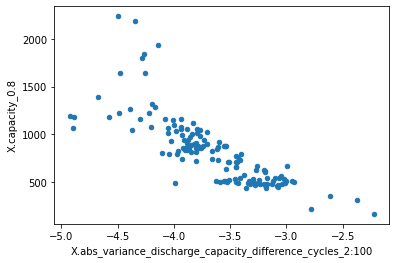

In [22]:
old_df_full.plot.scatter(x='X.abs_variance_discharge_capacity_difference_cycles_2:100', y = 'X.capacity_0.8')

In [23]:
train_ind = [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
        69, 71, 73, 75, 77, 79, 81]
test_ind = [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
        68, 70, 72, 74, 76, 78, 80, 82, 83]

In [24]:
# Variance model
X_train_var = old_df_full.iloc[train_ind][[variance_model_features]]
y_train = old_df_full.iloc[train_ind][[y]]

X_test_var = old_df_full.iloc[test_ind][[variance_model_features]]
y_test = old_df_full.iloc[test_ind][[y]]

reg_var = LinearRegression().fit(X_train_var,y_train)
y_pred_train_var = reg_var.predict(X_train_var)
y_pred_test_var = reg_var.predict(X_test_var)

rmse_train_var = np.sqrt(mean_squared_error(y_train, y_pred_train_var))
rmse_test_var = np.sqrt(mean_squared_error(y_test, y_pred_test_var))
mape_train_var = mean_absolute_percentage_error(y_train, y_pred_train_var)
mape_test_var = mean_absolute_percentage_error(y_test, y_pred_test_var)

print("Variance Model")
print("Training RMSE: ", rmse_train_var)
print("Test RMSE: ", rmse_test_var)
print("Mean % Train Error: ", mape_train_var)
print("Mean % Test Error: ", mape_test_var)

Variance Model
Training RMSE:  135.62503334493
Test RMSE:  127.88180518799862
Mean % Train Error:  0.17993325696610188
Mean % Test Error:  0.16873584348741344


#### From paper (Variance Model)
* Training RMSE: 103
* Test RMSE: 138
* Mean % Train Error: 14.1
* Mean % Test Error: 14.7

Text(0.5, 1.0, 'Variance Model Predicted vs. True Values')

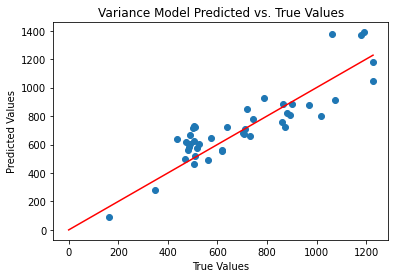

In [25]:
# Variance model
min_var = y_test.min()[0]
max_var = y_test.max()[0]

plt.scatter(y_test, y_pred_test_var)
plt.plot([0, max_var], [0, max_var], color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Variance Model Predicted vs. True Values")

In [26]:
# discharge model
X_train_dis = old_df_full.iloc[train_ind][discharge_model_features]
y_train = old_df_full.iloc[train_ind][[y]]

X_test_dis = old_df_full.iloc[test_ind][discharge_model_features]
y_test = old_df_full.iloc[test_ind][[y]]

reg_dis = LinearRegression().fit(X_train_dis,y_train)
y_pred_train_dis = reg_dis.predict(X_train_dis)
y_pred_test_dis = reg_dis.predict(X_test_dis)

rmse_train_dis = np.sqrt(mean_squared_error(y_train, y_pred_train_dis))
rmse_test_dis = np.sqrt(mean_squared_error(y_test, y_pred_test_dis))
mape_train_dis = mean_absolute_percentage_error(y_train, y_pred_train_dis)
mape_test_dis = mean_absolute_percentage_error(y_test, y_pred_test_dis)

print("Discharge Model")
print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train_dis)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test_dis)))
print("Mean % Train Error: ", mean_absolute_percentage_error(y_train, y_pred_train_dis))
print("Mean % Test Error: ", mean_absolute_percentage_error(y_test, y_pred_test_dis))

Discharge Model
Training RMSE:  75.16314536569475
Test RMSE:  89.43996365251705
Mean % Train Error:  0.09825945430791466
Mean % Test Error:  0.11019150889386012


#### From paper (Discharge Model)
* Training RMSE: 76
* Test RMSE: 91
* Mean % Train Error: 9.8
* Mean % Test Error: 13.0

Text(0.5, 1.0, 'Discharge Model Predicted vs. True Values')

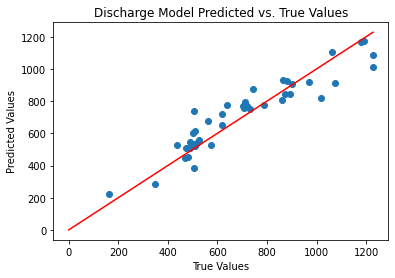

In [27]:
# Discharge model
max_dis = y_test.max()[0]

plt.scatter(y_test, y_pred_test_dis)
plt.plot([0, max_dis], [0, max_dis], color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Discharge Model Predicted vs. True Values")

In [28]:
# full model
X_train_full = old_df_full.iloc[train_ind][full_model_features]
y_train = old_df_full.iloc[train_ind][[y]]

X_test_full = old_df_full.iloc[test_ind][full_model_features]
y_test = old_df_full.iloc[test_ind][[y]]

reg_full = LinearRegression().fit(X_train_full,y_train)
y_pred_train_full = reg_full.predict(X_train_full)
y_pred_test_full = reg_full.predict(X_test_full)

rmse_train_full = np.sqrt(mean_squared_error(y_train, y_pred_train_full))
rmse_test_full = np.sqrt(mean_squared_error(y_test, y_pred_test_full))
mape_train_full = mean_absolute_percentage_error(y_train, y_pred_train_full)
mape_test_full = mean_absolute_percentage_error(y_test, y_pred_test_full)

print("Full Model")
print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train_full)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test_full)))
print("Mean % Train Error: ", mean_absolute_percentage_error(y_train, y_pred_train_full))
print("Mean % Test Error: ", mean_absolute_percentage_error(y_test, y_pred_test_full))

Full Model
Training RMSE:  77.05478185184526
Test RMSE:  68.9927612796257
Mean % Train Error:  0.09546875102512078
Mean % Test Error:  0.102042635636859


#### From paper (Full Model)
* Training RMSE: 51
* Test RMSE: 118
* Mean % Train Error: 5.6
* Mean % Test Error: 14.1

Text(0.5, 1.0, 'Full Model Predicted vs. True Values')

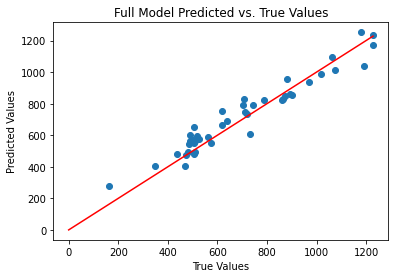

In [29]:
min_full = y_test.min()[0]
max_full = y_test.max()[0]

plt.scatter(y_test, y_pred_test_full)
plt.plot([0, max_full], [0, max_full], color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Full Model Predicted vs. True Values")

__Old Data Plots__

In [30]:
old_cycle_life = old_df_full["X.capacity_0.8"]

Text(0.5, 1.0, 'Frequency of Cycle Life')

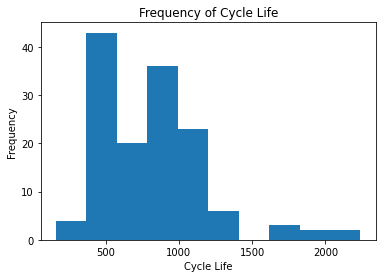

In [31]:
plt.hist(old_cycle_life)
plt.xlabel('Cycle Life')
plt.ylabel('Frequency')
plt.title('Frequency of Cycle Life')

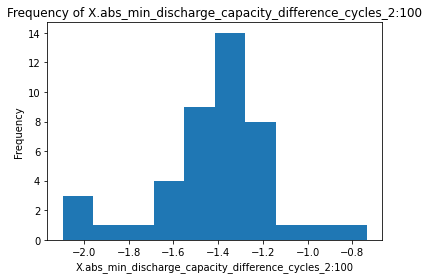

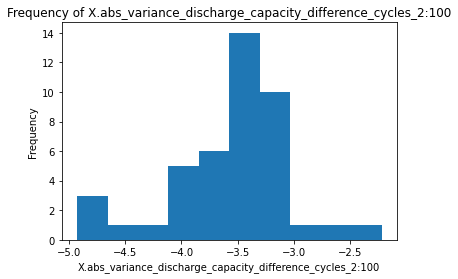

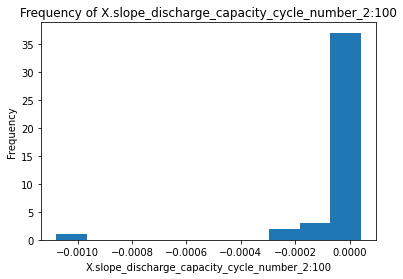

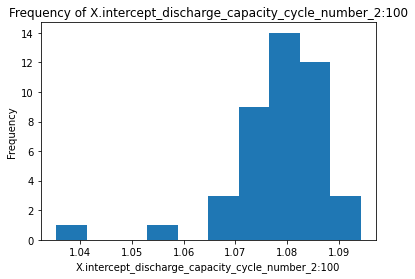

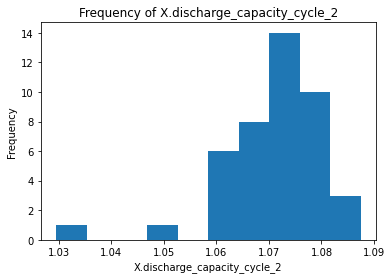

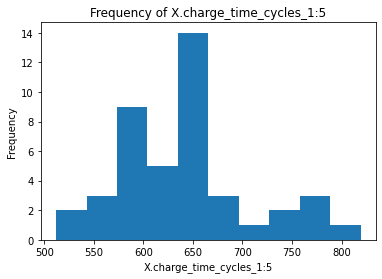

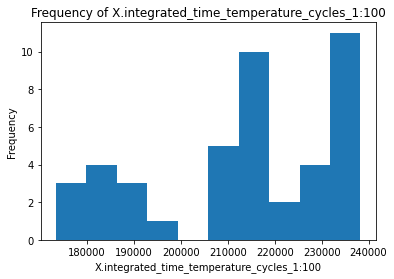

In [32]:
# All columns in X_test_full
for feature in X_test_full.columns:
    plt.hist(X_test_full[feature])
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title("Frequency of " + feature)
    plt.show()

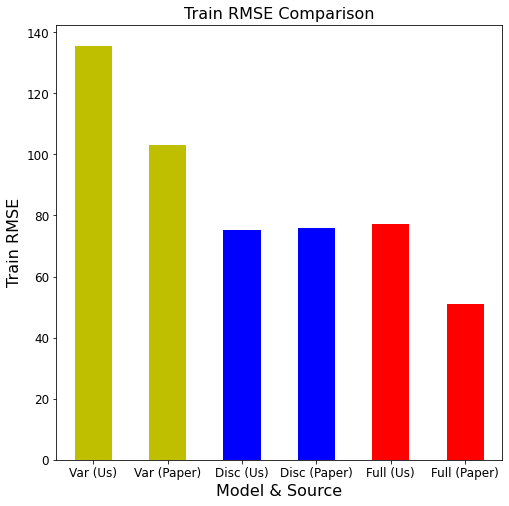

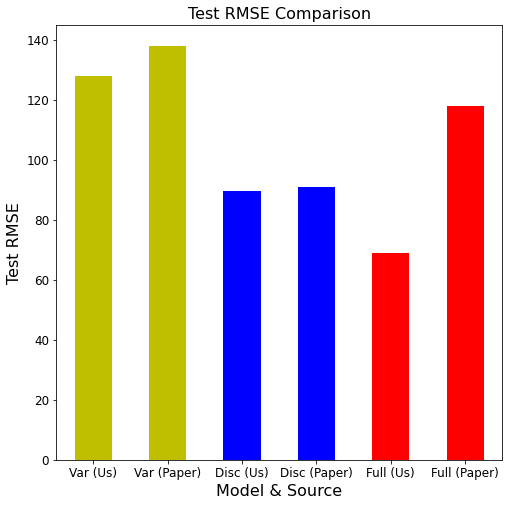

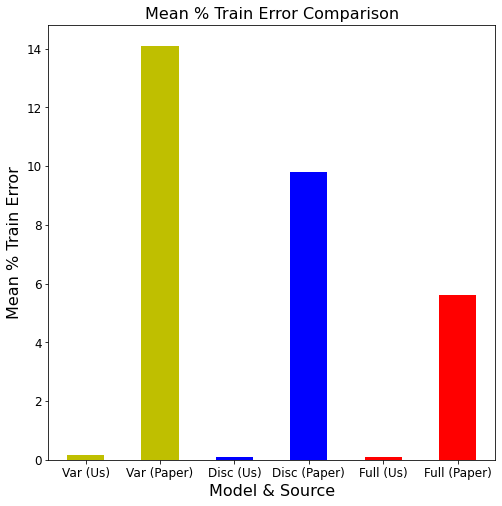

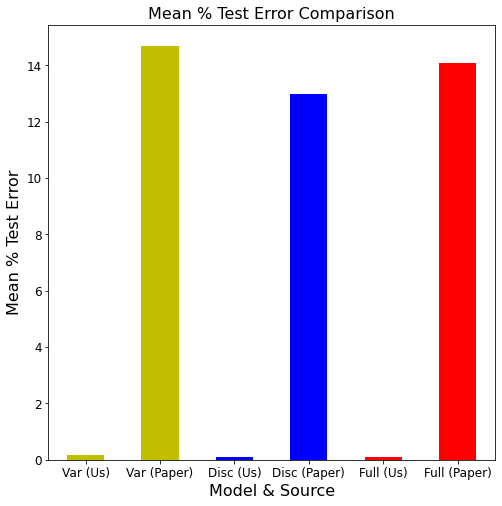

In [33]:
old_data_metrics = pd.DataFrame(data = {"Model & Source": ["Var (Us)", "Var (Paper)",
                                                           "Disc (Us)", "Disc (Paper)",
                                                           "Full (Us)", "Full (Paper)"],
                               
                               "Model": ["Variance", "Variance", 
                                         "Discharge", "Discharge", 
                                         "Full", "Full"],
                                        
                               "Source": ["Us", "Paper",
                                          "Us", "Paper",
                                          "Us", "Paper"],
                                        
                               "Train RMSE": [rmse_train_var, 103,
                                              rmse_train_dis, 76,
                                              rmse_train_full, 51],
                               
                               "Test RMSE": [rmse_test_var, 138,
                                             rmse_test_dis, 91, 
                                             rmse_test_full, 118],
                               
                               "Mean % Train Error": [mape_train_var, 14.1,
                                                      mape_train_dis, 9.8,
                                                      mape_train_full, 5.6],
                               
                               "Mean % Test Error": [mape_test_var, 14.7,
                                                     mape_test_dis, 13.0,
                                                     mape_test_full, 14.1]})


for column in old_data_metrics.columns[3:]:
    ax = old_data_metrics.plot.bar(x='Model & Source', y=column, rot=0,
                         fontsize = 12, legend=False, figsize = (8,8),
                         color = ["y","y","b","b","r","r"])

    ax.set_xlabel("Model & Source", fontsize = 16)
    ax.set_ylabel(column, fontsize=16)
    ax.set_title(column + " Comparison", fontsize=16)
    plt.show()

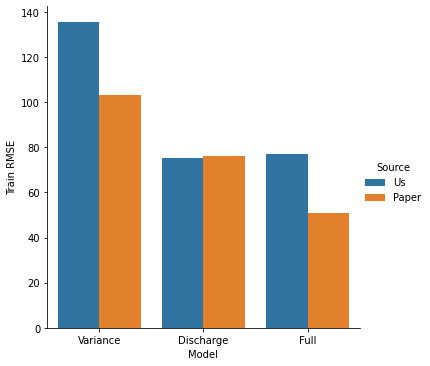

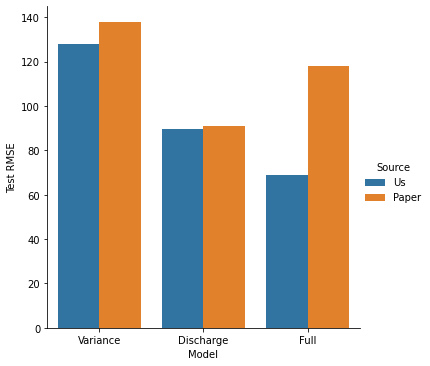

In [34]:
for column in old_data_metrics.columns[3:5]:
    sns.catplot(data = old_data_metrics, kind="bar",
               x = "Model", y = column, hue = "Source")

In [35]:
old_data_rmse = pd.DataFrame([[round(rmse_test_var), 138, "Variance"],
                              [round(rmse_test_dis), 91, "Discharge"],
                              [round(rmse_test_full), 118, "Full"]],
                             columns = ["Our Model RMSE", "Paper Model RMSE", "Model"]
                            ).set_index("Model")
old_data_rmse

,Our Model RMSE,Paper Model RMSE
Model,,
Variance,128,138
Discharge,89,91
Full,69,118


__New Data Models__

In [36]:
from sklearn.model_selection import KFold
from sklearn.utils import resample
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='X.abs_variance_discharge_capacity_difference_cycles_2:100', ylabel='X.capacity_0.8'>

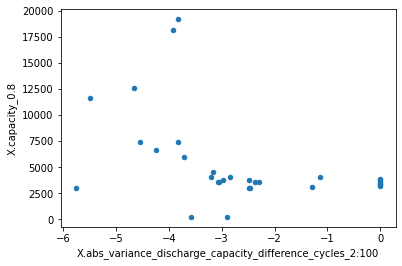

In [37]:
new_df_full.plot.scatter(x='X.abs_variance_discharge_capacity_difference_cycles_2:100', y = 'X.capacity_0.8')

In [38]:
# KFold 
splits = []
kf = KFold(n_splits=2,shuffle=True, random_state = 451)
for train_index, test_index in kf.split(new_df_full):
    splits.append((train_index,test_index))
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 3  4  5  6 11 12 13 14 17 20 22 24 27 28 29] TEST: [ 0  1  2  7  8  9 10 15 16 18 19 21 23 25 26]
TRAIN: [ 0  1  2  7  8  9 10 15 16 18 19 21 23 25 26] TEST: [ 3  4  5  6 11 12 13 14 17 20 22 24 27 28 29]


In [39]:
splits

[(array([ 3,  4,  5,  6, 11, 12, 13, 14, 17, 20, 22, 24, 27, 28, 29]),
  array([ 0,  1,  2,  7,  8,  9, 10, 15, 16, 18, 19, 21, 23, 25, 26])),
 (array([ 0,  1,  2,  7,  8,  9, 10, 15, 16, 18, 19, 21, 23, 25, 26]),
  array([ 3,  4,  5,  6, 11, 12, 13, 14, 17, 20, 22, 24, 27, 28, 29]))]

In [40]:
train_ind = splits[0][0]
test_ind = splits[0][1]

In [41]:
# Variance model
X_train_var = new_df_full.iloc[train_ind][[variance_model_features]]
y_train = new_df_full.iloc[train_ind][[y]]

X_test_var = new_df_full.iloc[test_ind][[variance_model_features]]
y_test = new_df_full.iloc[test_ind][[y]]

reg_var = LinearRegression().fit(X_train_var,y_train)
y_pred_train_var = reg_var.predict(X_train_var)
y_pred_test_var = reg_var.predict(X_test_var)

rmse_train_var = np.sqrt(mean_squared_error(y_train, y_pred_train_var))
rmse_test_var = np.sqrt(mean_squared_error(y_test, y_pred_test_var))
mape_train_var = mean_absolute_percentage_error(y_train, y_pred_train_var)
mape_test_var = mean_absolute_percentage_error(y_test, y_pred_test_var)

print("Variance Model")
print("Training RMSE: ", rmse_train_var)
print("Test RMSE: ", rmse_test_var)
print("Mean % Train Error: ", mape_train_var)
print("Mean % Test Error: ", mape_test_var)

Variance Model
Training RMSE:  4204.748864082592
Test RMSE:  3742.160522812178
Mean % Train Error:  4.350539674900049
Mean % Test Error:  0.5709420780145043


Text(0.5, 1.0, 'Variance Model Predicted vs. True Values')

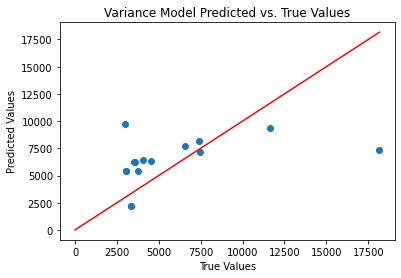

In [42]:
# Variance model
max_var = y_test.max()[0]

plt.scatter(y_test, y_pred_test_var)
plt.plot([0, max_var], [0, max_var], color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Variance Model Predicted vs. True Values")

In [43]:
# discharge model
X_train_dis = new_df_full.iloc[train_ind][discharge_model_features]
X_train_dis = X_train_dis.replace([np.inf, -np.inf], np.nan)
X_train_dis.dropna(inplace = True)
X_train_dis_index = list(X_train_dis.index.values)

y_train = new_df_full.iloc[X_train_dis_index][[y]]

X_test_dis = new_df_full.iloc[test_ind][discharge_model_features]
X_test_dis = X_test_dis.replace([np.inf, -np.inf], np.nan)
X_test_dis.dropna(inplace = True)
X_test_dis_index = list(X_test_dis.index.values)

y_test = new_df_full.iloc[X_test_dis_index][[y]]

reg_dis = LinearRegression().fit(X_train_dis,y_train)
y_pred_train_dis = reg_dis.predict(X_train_dis)
y_pred_test_dis = reg_dis.predict(X_test_dis)

rmse_train_dis = np.sqrt(mean_squared_error(y_train, y_pred_train_dis))
rmse_test_dis = np.sqrt(mean_squared_error(y_test, y_pred_test_dis))
mape_train_dis = mean_absolute_percentage_error(y_train, y_pred_train_dis)
mape_test_dis = mean_absolute_percentage_error(y_test, y_pred_test_dis)

print("Discharge Model")
print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train_dis)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test_dis)))
print("Mean % Train Error: ", mean_absolute_percentage_error(y_train, y_pred_train_dis))
print("Mean % Test Error: ", mean_absolute_percentage_error(y_test, y_pred_test_dis))

Discharge Model
Training RMSE:  855.62028152526
Test RMSE:  1887.321767609928
Mean % Train Error:  0.8086869384400579
Mean % Test Error:  0.34648760373990184


Text(0.5, 1.0, 'Discharge Model Predicted vs. True Values')

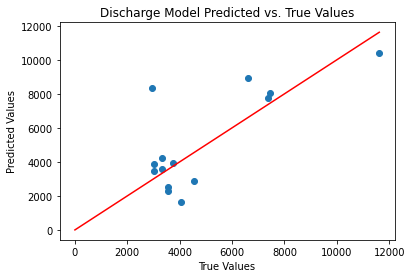

In [44]:
# Discharge model
max_dis = y_test.max()[0]

plt.scatter(y_test, y_pred_test_dis)
plt.plot([0, max_dis], [0, max_dis], color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Discharge Model Predicted vs. True Values")

In [45]:
# full model
X_train_full = new_df_full.iloc[train_ind][full_model_features]
X_train_full.replace(-np.Inf, np.nan, inplace = True)
X_train_full.dropna(inplace = True)
X_train_full_index = list(X_train_full.index.values)

y_train = new_df_full.iloc[X_train_full_index][[y]]

X_test_full = new_df_full.iloc[test_ind][full_model_features]
X_test_full.replace(-np.Inf, np.nan, inplace = True)
X_test_full.dropna(inplace = True)
X_test_full_index = list(X_test_full.index.values)

y_test = new_df_full.iloc[X_test_full_index][[y]]

reg_full = LinearRegression().fit(X_train_full,y_train)
y_pred_train_full = reg_full.predict(X_train_full)
y_pred_test_full = reg_full.predict(X_test_full)

rmse_train_full = np.sqrt(mean_squared_error(y_train, y_pred_train_full))
rmse_test_full = np.sqrt(mean_squared_error(y_test, y_pred_test_full))
mape_train_full = mean_absolute_percentage_error(y_train, y_pred_train_full)
mape_test_full = mean_absolute_percentage_error(y_test, y_pred_test_full)

print("Full Model")
print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train_full)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test_full)))
print("Mean % Train Error: ", mean_absolute_percentage_error(y_train, y_pred_train_full))
print("Mean % Test Error: ", mean_absolute_percentage_error(y_test, y_pred_test_full))

Full Model
Training RMSE:  601.3870109686596
Test RMSE:  1072.696431891847
Mean % Train Error:  0.6174303572146601
Mean % Test Error:  0.15141301561540432


Text(0.5, 1.0, 'Full Model Predicted vs. True Values')

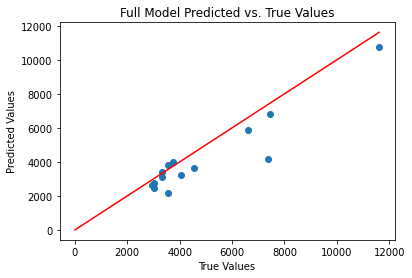

In [46]:
# full model
max_full = y_test.max()[0]

plt.scatter(y_test, y_pred_test_full)
plt.plot([0, max_full], [0, max_full], color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Full Model Predicted vs. True Values")

__New Data Plots__

In [47]:
new_cycle_life = new_df_full["X.capacity_0.8"]

Text(0.5, 1.0, 'Frequency of Cycle Life')

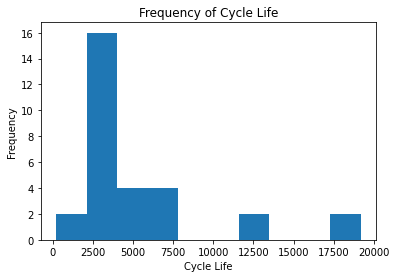

In [48]:
plt.hist(new_cycle_life)
plt.xlabel('Cycle Life')
plt.ylabel('Frequency')
plt.title('Frequency of Cycle Life')

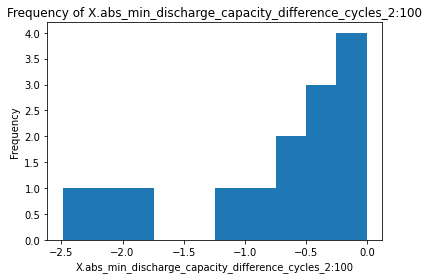

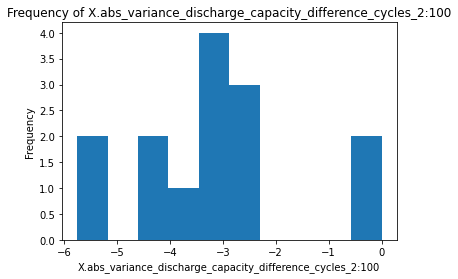

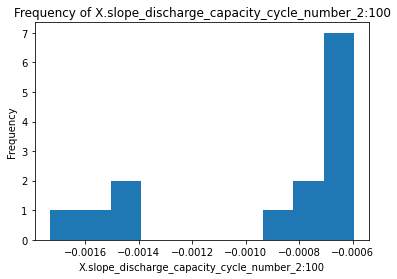

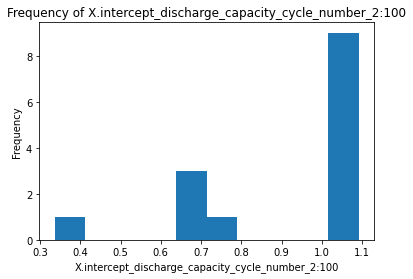

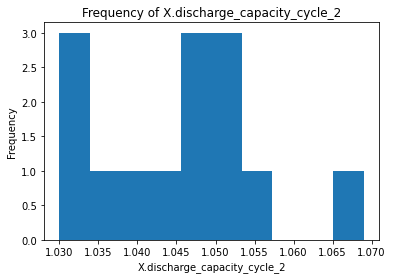

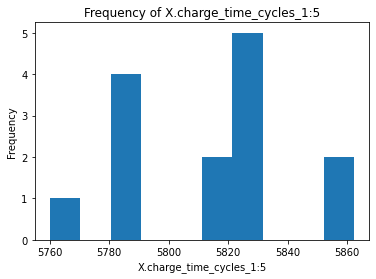

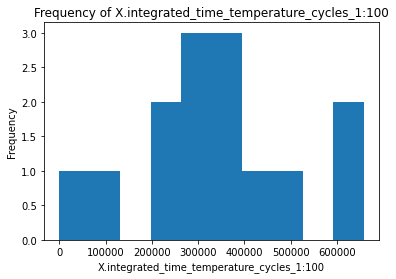

In [49]:
# All columns in X_test_full
for feature in X_test_full.columns:
    plt.hist(X_test_full[feature])
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title("Frequency of " + feature)
    plt.show()

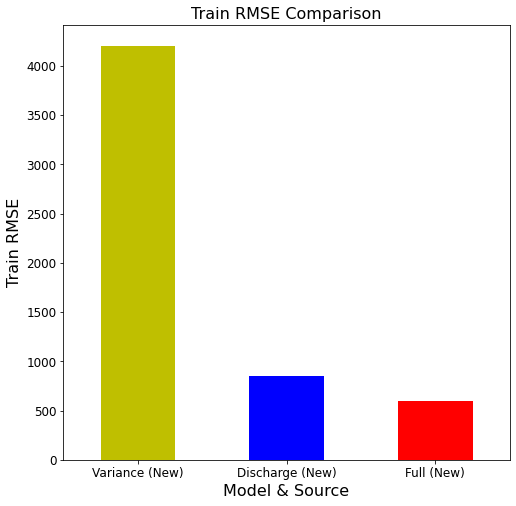

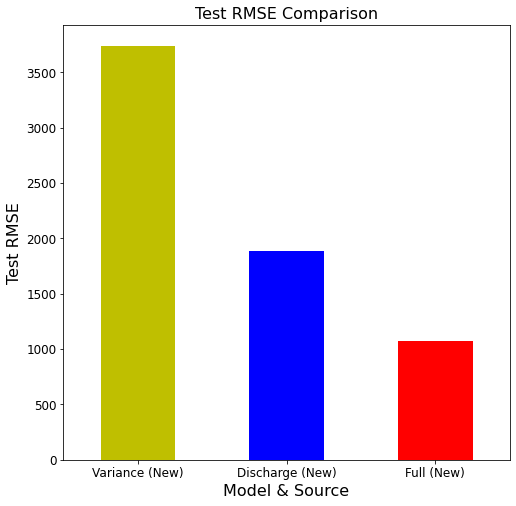

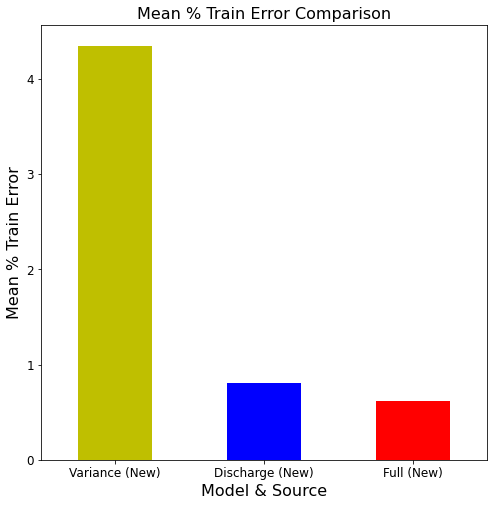

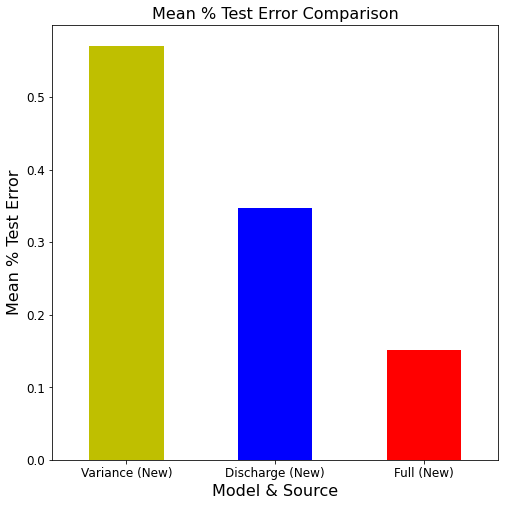

In [50]:
metrics = pd.DataFrame(data = {"Model & Source": ["Variance (New)","Discharge (New)", "Full (New)"],
                               "Train RMSE": [rmse_train_var, rmse_train_dis, rmse_train_full],
                               "Test RMSE": [rmse_test_var, rmse_test_dis, rmse_test_full],
                               "Mean % Train Error": [mape_train_var, mape_train_dis, mape_train_full],
                               "Mean % Test Error": [mape_test_var, mape_test_dis, mape_test_full]})


for column in metrics.columns[1:]:
    ax = metrics.plot.bar(x='Model & Source', y=column, rot=0,
                         fontsize = 12, legend=False, figsize = (8,8),
                         color = ["y","b","r"])

    ax.set_xlabel("Model & Source", fontsize = 16)
    ax.set_ylabel(column, fontsize=16)
    ax.set_title(column + " Comparison", fontsize=16)
    plt.show()

In [51]:
pd.DataFrame([[round(rmse_test_var), "Variance"], 
              [round(rmse_test_dis), "Discharge"], 
              [round(rmse_test_full), "Full"]], 
             columns = ["Our Model RMSE", "Model"]
            ).set_index("Model")

,Our Model RMSE
Model,
Variance,3742
Discharge,1887
Full,1073


__Combined Plots__

C:\Users\david\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


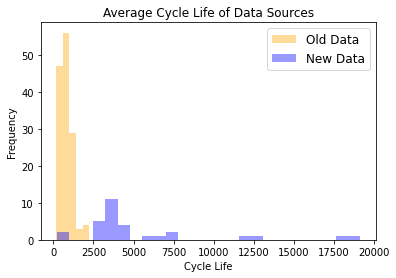

In [52]:
sns.distplot(old_cycle_life, kde=False, color="orange", label='Old Data', bins=5)
sns.distplot(new_cycle_life, kde=False, color="blue", label='New Data', bins=25)

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Average Cycle Life of Data Sources')
plt.xlabel('Cycle Life')
plt.ylabel('Frequency');